In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rc,rcParams

fig_direc = 'C:/Users/svo/Google Drive/Bas Zahy Gianni - Games/Manuscripts/Paper/Figures/'
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
#rcParams['font.sans-serif'] = "Helvetica Neue LT Std"
#rcParams['font.family'] = "sans-serif"

direc = 'C:/Users/svo/Google Drive/Bas Games/'

param_names = [r'$\theta$',r'$\gamma$',r'$\delta$',r'$\lambda$',r'$C$',r'$w_{\text{center}}$',
               r'$w_{\text{connected 2-in-a-row}}$',r'$w_{\text{unconnected 2-in-a-row}}$',
              r'$w_{\text{3-in-a-row}}$',r'$w_{\text{4-in-a-row}}$']

Nparams = len(param_names)

In [8]:
def plot_param_bars(rho,sem,xlabel,c,filename,letter):
    fig,ax = plt.subplots()
    ax.set_xlim([0,1])
    ax.set_xlabel(xlabel,usetex=False)
    ax.barh(range(Nparams,0,-1), rho, xerr=sem, align='center',
        color=c, ecolor='black')
    plt.xticks(usetex=False)
    plt.yticks(range(Nparams,0,-1),param_names,usetex=True, fontsize =14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.02, 0.9, letter, horizontalalignment='left',
            verticalalignment='center', transform=fig.transFigure, fontsize = 20)
    fig.tight_layout()
    fig.savefig(fig_direc + filename)
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/svo/Google Drive/Bas Zahy Gianni - Games/Manuscripts/Paper/Figures/param_corrs_A.pdf'

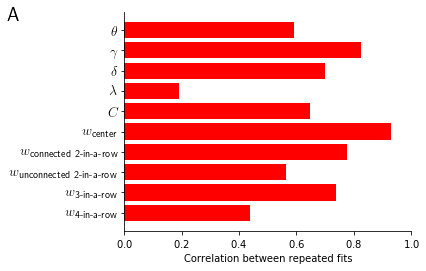

In [9]:
P=np.vstack([np.loadtxt(direc + 'Analysis/Params/params_hvh_' + m + '_short.txt') 
             for m in ['final','final2']])
P=np.mean(np.reshape(P,[int(P.shape[0]/5),5,10]),axis=1)
rho4=[stats.spearmanr(P[:40,i],P[40:,i]).correlation for i in range(10)]
plot_param_bars(rho4,[0 for r in rho4],'Correlation between repeated fits','Red','param_corrs_A.pdf','A')

In [ ]:
P=np.vstack([np.loadtxt(direc + 'Analysis/Params/params_' + e + '_final_short.txt') 
             for e in ['hvh','learn','tai','tur','gen','eye']])
P=np.reshape(P,[int(P.shape[0]/5),5,10])
p1=[stats.ttest_1samp(stats.spearmanr(P[:,:,i])[0][np.triu_indices(5,1)],popmean=0).pvalue 
    for i in range(10)]
rho1=[np.mean(stats.spearmanr(P[:,:,i])[0][np.triu_indices(5,1)]) for i in range(10)]
sem1=[np.std(stats.spearmanr(P[:,:,i])[0][np.triu_indices(5,1)])/np.sqrt(10) for i in range(10)]
plot_param_bars(rho1,sem1,'Correlation between cross-validation splits','green','param_corrs_B.pdf','B')

In [ ]:
P=np.vstack([np.loadtxt(direc + 'Analysis/Params/params_' + e + '_final_short.txt') 
             for e in ['hvh','learn','tai','tur','gen','eye']])
P=np.reshape(P,[int(P.shape[0]/5),5,10])
#p1=[stats.ttest_1samp(stats.spearmanr(P[:,:,i])[0][np.triu_indices(5,1)],popmean=0).pvalue 
#    for i in range(10)]
#rho1=[np.mean(stats.spearmanr(P[:,:,i])[0][np.triu_indices(5,1)]) for i in range(10)]
#sem1=[np.std(stats.spearmanr(P[:,:,i])[0][np.triu_indices(5,1)])/np.sqrt(10) for i in range(10)]
#plot_param_bars(rho1,sem1,'Correlation between cross-validation splits','green','param_corrs_B.pdf','B')

In [ ]:
print(np.nanmean(np.std(P,axis=1)/np.sqrt(5),axis=0)[2],np.nanstd(np.std(P,axis=1)/np.sqrt(5),axis=0)[2]/np.sqrt(P.shape[0]))
p1=[stats.ttest_1samp(stats.spearmanr(P[:,:,i])[0][np.triu_indices(5,1)],popmean=0).pvalue 
    for i in range(10)]
rho1=[np.mean(stats.spearmanr(P[:,:,i])[0][np.triu_indices(5,1)]) for i in range(10)]
sem1=[np.std(stats.spearmanr(P[:,:,i])[0][np.triu_indices(5,1)])/np.sqrt(10) for i in range(10)]
print(rho1[2],sem1[2])

In [ ]:
#correlations across learning sessions 
P=np.loadtxt(direc + 'Analysis/Params/params_learn_final_short.txt')
P=np.mean(np.reshape(P,[int(P.shape[0]/5),5,10]),axis=1)
rho2 = [np.mean(np.hstack([[stats.spearmanr(P[n::5,i],P[m::5,i])[0] for m in range(n)] for n in range(5)])) for i in range(10)]
sem2 = [np.std(np.hstack([[stats.spearmanr(P[n::5,i],P[m::5,i])[0]/np.sqrt(10) for m in range(n)] for n in range(5)])) for i in range(10)]
p2 = [stats.ttest_1samp(np.hstack([[stats.spearmanr(P[n::5,i],P[m::5,i])[0] for m in range(n)] for n in range(5)]),popmean=0).pvalue for i in range(10)]
plot_param_bars(rho2,sem2,'Correlation between learning sessions','Orange','param_corrs_C.pdf','C')

In [ ]:
P=np.loadtxt(direc + 'Analysis/Params/params_tai_final_short.txt')
P=np.mean(np.reshape(P,[int(P.shape[0]/5),5,10]),axis=1)
rho3 = [np.mean(np.hstack([[stats.spearmanr(P[n::3,i],P[m::3,i])[0] for m in range(n)] for n in range(3)])) for i in range(10)]
sem3 = [np.std(np.hstack([[stats.spearmanr(P[n::3,i],P[m::3,i])[0]/np.sqrt(3) for m in range(n)] for n in range(3)])) for i in range(10)]
p3 = [stats.ttest_1samp(np.hstack([[stats.spearmanr(P[n::3,i],P[m::3,i])[0] for m in range(n)] for n in range(3)]),popmean=0).pvalue for i in range(10)]
plot_param_bars(rho3,sem3,'Correlation between time constraint conditions','Purple','param_corrs_D.pdf','D')

In [4]:
direc = 'C:/Users/Bas/Google Drive/Bas Games/Analysis/loglik/'

def get_mean(fname):
    try:
        x = np.loadtxt(fname)
        if len(x.shape)>1:
            return np.mean(x[:,np.nonzero(np.prod(x>0,axis=0))[0]])
        else:
            return np.mean(x)
    except OSError:
        print('File not found: ' + fname)
        return np.nan
    
def get_data(fname):
    try:
        x = np.loadtxt(fname)
        if len(x.shape)>1:
            return np.mean(x[:,np.nonzero(np.prod(x>0,axis=0))[0]],axis=1)
        else:
            print(fname)
            return np.mean(x)
    except OSError:
        print('File not found: ' + fname)
        return np.nan




In [52]:
direc = 'C:/Users/svo/Google Drive/Bas Games/Analysis/loglik/'

models=['final','final_nonoise','final_nodelta','final_noprune','final_notree','final_noact','final_no3',
        'final_no2conn','final_nocenter','final_no4','final_no2unc',
        'final_optweights','final_mcts_myopic','final_drop_tile','final_fixed_iters',
        'final_fixed_depth','final_fixed_branch','final_weight_hvd','final_drop_hvd',
        'final_triangle','final_drop_type','final_opp','final_mcts_rand']

model_names = ['Main','No noise','No feature drop','No pruning','No tree','No active scaling',
               'No 3-in-a-row','No connected 2-in-a-row','No center','No 4-in-a-row',
               'No unconnected 2-in-a-row','Optimal weights','Monte Carlo Tree Search',
               'Tile dropping','Fixed iterations','Fixed depth','Fixed branching',
               'Orientation-dependent weights','Orientation-dependent dropping','Triangle',
               'Type-dependent dropping','Opponent scaling','Random-playout MCTS']

model_colors = ['black'] + ['#A30006']*10 + ['#025D8C']*6 + ['#519548']*5 + ['gray']              

mpl.rcParams['text.usetex'] = False

L = [np.hstack([get_data(direc + 'loglik_' + d + '_' + m + '.txt') for d in ['learn1','learn2','learn3']]) for m in models]
loglik_learn = np.array([np.mean(np.mean(np.reshape(L[i],[30,5,5]),axis=2),axis=0) for i,m in enumerate(models)])

L = [np.hstack([get_data(direc + 'loglik_' + d + '_' + m + '.txt') for d in ['tai1','tai2']]) for m in models]
loglik_tai = np.array([np.mean(np.mean(np.reshape(L[i],[30,3,5]),axis=2),axis=0) for i,m in enumerate(models)])

loglik = np.hstack([np.array([[get_mean(direc + 'loglik_' + d + '_' + m + '.txt') 
                               for d in ['hvh','gen','eye']] 
                              for m in models]),
                    loglik_learn,loglik_tai])


In [50]:
loglik_learn

array([[1.92452287, 1.85827167, 1.8115142 , 1.73879587, 1.73176653],
       [2.04406747, 1.99347273, 1.95234467, 1.88781053, 1.87431347],
       [1.95788619, 1.89620747, 1.8604156 , 1.7795726 , 1.76115193],
       [1.94825941, 1.91790253, 1.85706387, 1.79091353, 1.77785547],
       [1.95072333, 1.894974  , 1.850724  , 1.7876764 , 1.79248493],
       [1.93836245, 1.86452333, 1.820164  , 1.75284613, 1.7435244 ],
       [2.16468393, 2.12419007, 2.08989927, 2.0127512 , 2.00305033],
       [2.00808073, 1.94982707, 1.9110424 , 1.84558407, 1.83806527],
       [1.98932173, 1.94037993, 1.91341493, 1.8507164 , 1.83784507],
       [1.9358816 , 1.88123467, 1.82993693, 1.77109613, 1.74972907],
       [1.94022982, 1.87910293, 1.82750853, 1.76320367, 1.7552634 ],
       [1.94817328, 1.9291218 , 1.89167733, 1.84984213, 1.84035907],
       [1.95183387, 1.89059927, 1.86962253, 1.792574  , 1.7825428 ],
       [1.91857171, 1.84928713, 1.8085872 , 1.743809  , 1.72782687],
       [1.92145124, 1.85126953, 1.

In [17]:
np.savetxt(direc + 'loglik_learn.csv',loglik_learn)

In [30]:
list(zip(model_names,np.mean(loglik_learn,axis=1)-np.mean(loglik_learn[0])))

[('Main', 0.0),
 ('No noise', 0.1374275466666668),
 ('No feature drop', 0.03807253200000038),
 ('No pruning', 0.04542473600000041),
 ('No tree', 0.04234230666666683),
 ('No active scaling', 0.010909837333333838),
 ('No 3-in-a-row', 0.2659407333333337),
 ('No connected 2-in-a-row', 0.0975456800000003),
 ('No center', 0.09336138533333371),
 ('No 4-in-a-row', 0.020601453333333852),
 ('No unconnected 2-in-a-row', 0.020087444000000065),
 ('Optimal weights', 0.07886049600000034),
 ('Monte Carlo Tree Search', 0.044460266666666914),
 ('Tile dropping', -0.0033578453333329428),
 ('Fixed iterations', -0.00267073866666645),
 ('Fixed depth', -0.015580022666666693),
 ('Fixed branching', -0.017939763999999414),
 ('Orientation-dependent weights', 0.0010009253333336243),
 ('Orientation-dependent dropping', -0.0018473346666663115),
 ('Triangle', 0.0025452066666669104),
 ('Type-dependent dropping', -0.002043191999999916),
 ('Opponent scaling', 8.252666666708208e-05),
 ('Random-playout MCTS', 0.9241635066

In [18]:
direc

'C:/Users/svo/Google Drive/Bas Games/Analysis/loglik/'

In [31]:
def ave_across_splits(p):
    if len(p.shape)==2:
        return np.nanmean(np.reshape(p,[int(p.shape[0]/5),5,int(p.shape[1])]),axis=1)
    elif len(p.shape)==1:
        return np.nanmean(np.reshape(p,[int(p.shape[0]/5),5]),axis=1)
    else:
        return np.nan

#data_sets = ['hvh','gen','eye','learn1','learn2','learn3','tai1','tai2']
data_sets = ['learn1','learn2','learn3']
loglik_all = [[ave_across_splits(get_data(direc + 'loglik_' + d + '_' + m + '.txt')) 
                      for m in models] for d in data_sets]

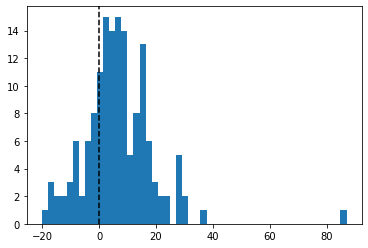

(150, 1)
Ttest_1sampResult(statistic=array([6.67273126]), pvalue=array([4.6232001e-10]))


In [32]:
L_treeminusnotree = 160*ave_across_splits(np.hstack([get_data(direc + 'loglik_' + d + '_final_notree.txt') - 
                                                 get_data(direc + 'loglik_' + d + '_final.txt')                               
                                                 for d in data_sets])[:,None])
plt.hist(L_treeminusnotree,50)
plt.axvline(x=0,linestyle='dashed',color='black')
plt.savefig('Tree-minus-notree.pdf')
plt.show()
print(L_treeminusnotree.shape)
import scipy.stats as sts
print(sts.ttest_1samp(L_treeminusnotree,popmean=0))

In [33]:
L_mainminusno2conn = ave_across_splits(np.hstack([get_data(direc + 'loglik_' + d + '_final_no2conn.txt') - 
                                                 get_data(direc + 'loglik_' + d + '_final.txt')                               
                                                 for d in data_sets])[:,None])
print(np.mean(L_mainminusno2conn),np.std(L_mainminusno2conn)/np.sqrt(L_mainminusno2conn.shape[0]))

0.09754568 0.005247281466091178


In [34]:
x=np.reshape(L_treeminusnotree[90:-90]/160,[30,5])
plt.plot(x.T,'.-',color='gray')
plt.errorbar(range(5),np.mean(x,axis=0),np.std(x,axis=0)/np.sqrt(30),color='black')
plt.show()

ValueError: cannot reshape array of size 0 into shape (30,5)

In [35]:
np.array(loglik_all).shape

(3, 23, 50)

In [40]:
loglik_big = [np.hstack([ave_across_splits(get_data(direc + 'loglik_' + d + '_'+ m +'.txt')) 
                                      for d in data_sets]) for m in models]
loglik_sem = [np.nanstd(l)/np.sqrt(150) for l in loglik_big]

In [45]:
loglik_sem

[0.02232617915126972,
 0.0196299952436744,
 0.023440723231729958,
 0.023347025782101908,
 0.02178823971805926,
 0.02198655983427648,
 0.022838987640087686,
 0.020410714097935802,
 0.020164621728562853,
 0.02216195757524506,
 0.023079615129784015,
 0.01952575100498214,
 0.02056974630287403,
 0.022156693483644196,
 0.021794989850822667,
 0.02253840307998863,
 0.022075915914268253,
 0.022254360106950106,
 0.022573791421270317,
 0.021981879846985925,
 0.022553945994242004,
 0.021633622110405287,
 0.010550381728010405]

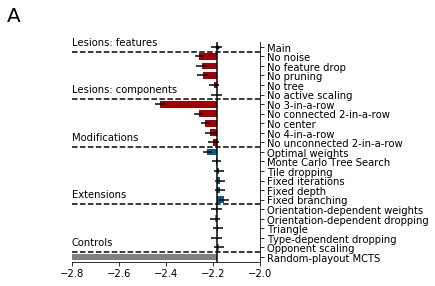

In [57]:
fig, ax = plt.subplots()

loglik=loglik_tai

loglik_main = -np.mean(loglik[0,:])
loglik_diff = -np.mean(loglik,axis=1) - loglik_main

ax.set_ylim([0.5,len(model_names)+0.5])
ax.set_xlim([-2.3,-1.9])
ax.set_yticks(range(len(model_names),0,-1))
ax.set_yticklabels(model_names)
ax.barh(range(len(model_names),0,-1), loglik_diff, xerr = loglik_sem, height = 0.7, align='center',
     color=model_colors, ecolor='black', left=loglik_main)
ax.plot(loglik_main,len(model_names),'.k')
ax.axvline(x=loglik_main, color='black')
ax.axhline(y=22.5, color='black', linestyle = 'dashed')
ax.axhline(y=17.5, color='black', linestyle = 'dashed')
ax.axhline(y=12.5, color='black', linestyle = 'dashed')
ax.axhline(y=6.5, color='black', linestyle = 'dashed')
ax.axhline(y=1.5, color='black', linestyle = 'dashed')
ax.yaxis.tick_right()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim([-2.8,-2.0])
ax.text(-2.8,23, 'Lesions: features', ha ='left', va='bottom')
ax.text(-2.8,18, 'Lesions: components', ha ='left', va='bottom')
ax.text(-2.8,13, 'Modifications', ha ='left', va='bottom')
ax.text(-2.8,7, 'Extensions', ha ='left', va='bottom')
ax.text(-2.8,2, 'Controls', ha ='left', va='bottom')
ax.text(0, 0.95, 'A', horizontalalignment='left',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)

fig.tight_layout()
fig.savefig(direc + 'loglik_rep_A.pdf')
plt.show()


In [10]:
loglik

NameError: name 'loglik' is not defined

In [ ]:
letters = ['B','C','D','E','F','G','H','I','J','K','L']

for i,letter in enumerate(letters):
    fig, ax = plt.subplots()
    
    loglik_main = -loglik[0,i]
    loglik_diff = -loglik[:,i] - loglik_main

    ax.set_ylim([0.5,len(model_names)+0.5])
    ax.set_yticks(range(len(model_names),0,-1))
    ax.set_yticklabels(model_names)
    ax.barh(range(len(model_names),0,-1), loglik_diff, height = 0.7, align='center',
         color=model_colors, ecolor='black', left=loglik_main)
    ax.plot(loglik_main,len(model_names),'.k')
    ax.axvline(x=loglik_main, color='black')
    ax.axhline(y=22.5, color='black', linestyle = 'dashed')
    ax.axhline(y=17.5, color='black', linestyle = 'dashed')
    ax.axhline(y=12.5, color='black', linestyle = 'dashed')
    ax.axhline(y=6.5, color='black', linestyle = 'dashed')
    ax.axhline(y=1.5, color='black', linestyle = 'dashed')
    ax.yaxis.tick_right()
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim([-2.8,-1.7])
    ax.text(-2.8,23, 'Lesions: features', ha ='left', va='bottom')
    ax.text(-2.8,18, 'Lesions: components', ha ='left', va='bottom')
    ax.text(-2.8,13, 'Modifications', ha ='left', va='bottom')
    ax.text(-2.8,7, 'Extensions', ha ='left', va='bottom')
    ax.text(-2.8,2, 'Controls', ha ='left', va='bottom')
    ax.text(0, 0.95, letter, horizontalalignment='left',
            verticalalignment='center', transform=fig.transFigure, fontsize = 20)
    fig.tight_layout()
    fig.savefig(fig_direc + 'loglik_rep_' + letter + '.png')
    plt.show()


In [ ]:
c = np.array([[stats.spearmanr(loglik[:,i],loglik[:,j],nan_policy='omit').correlation 
               for i in range(loglik.shape[1])] for j in range(loglik.shape[1])])

data_names= ['Human-vs-human','Generalization','Eye tracking','Learning session 1',
             'Learning session 2','Learning session 3','Learning session 4','Learning session 5',
             'Time pressure 5-second','Time pressure 10-second','Time pressure 20-second']



In [ ]:
fig, ax = plt.subplots()

cax = ax.imshow(c,interpolation='nearest',cmap='Reds',vmin=0,vmax=1)

ax.set_xticks(range(len(data_names)))
ax.set_yticks(range(len(data_names)))
ax.set_yticklabels(data_names)
ax.set_xticklabels(data_names,rotation=60,ha='right')
cbar = fig.colorbar(cax, ticks=[0, 0.5, 1])
fig.tight_layout()
ax.text(0.2, 0.9, 'A', horizontalalignment='left',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
fig.savefig(fig_direc + 'loglik_corr_A.pdf')
plt.show()

print(np.mean(c[np.triu_indices(11,1)]),np.std(c[np.triu_indices(11,1)])/np.sqrt(10*11/2))

In [ ]:
color_names = ['','#E5711E','#E6AC27','#B1D7DB','#7AB6B0','#4C8F7D','#2A654A',
               '#11321E','#FFAC9A','#F85D5F','#9B1A30']    
    
fig, ax = plt.subplots(figsize=(8,6))
for i in range(1,len(data_names)):
    ax.plot(-loglik[:,0],-loglik[:,i],'.',label=data_names[i],color = color_names[i],markersize =8)
    
ax.set_xlim([-2.8,-1.9])
ax.set_ylim([-3,-1.6])
ax.set_xlabel('Log-likelihood on \nhuman-vs-human data',fontsize = 20)
ax.set_ylabel('Log-likelihood on \nhuman-vs-computer data',fontsize = 20)
#ax.text(0.02, 0.9, 'B', horizontalalignment='left',
#        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(frameon=False,fontsize = 14)

fig.tight_layout()
fig.savefig(fig_direc + 'loglik_corr_B.png')
plt.show()


In [ ]:
color_names = ['','#E5711E','#E6AC27','#B1D7DB','#7AB6B0','#4C8F7D','#2A654A',
               '#11321E','#FFAC9A','#F85D5F','#9B1A30']    
    
fig, ax = plt.subplots(figsize=(8,6))
for i in range(1,2):#len(data_names)):
    ax.plot(-loglik[:,0],-loglik[:,i],'.',label=data_names[i],color = color_names[i],markersize =8)
    
ax.set_xlim([-2.8,-1.9])
ax.set_ylim([-3,-1.6])
ax.set_xlabel('Log-likelihood on \nhuman-vs-human data',fontsize = 20)
ax.set_ylabel('Log-likelihood on \nhuman-vs-computer data',fontsize = 20)
#ax.text(0.02, 0.9, 'B', horizontalalignment='left',
#        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.legend(frameon=False)

fig.tight_layout()
fig.savefig(fig_direc + 'loglik_corr_generalization.png')
plt.show()

In [ ]:
fig, ax = plt.subplots()
for i,col in enumerate(model_colors):
    ax.plot(range(1,6),(loglik_learn[0,:]-loglik_learn[i,:]).T,'.-',color=col)
ax.set_xlabel('Learning session')
ax.set_ylabel('Log-likelihood difference with\nmain model')
ax.set_xticks(range(1,6))
ax.text(0.02, 0.9, 'A', horizontalalignment='left',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
fig.savefig(fig_direc + 'loglik_learn_A.pdf')
plt.show()

In [ ]:
loglik_learn.shape

In [ ]:
fig, ax = plt.subplots()
for i,col in enumerate(model_colors):
    ax.plot(range(1,6),(loglik_learn[i,0]-loglik_learn[i,:]).T,'.-',color=col)
ax.set_xlabel('Learning session')
ax.set_ylabel('Log-likelihood difference with\nfirst session')
ax.set_xticks(range(1,6))
ax.text(0.02, 0.9, 'B', horizontalalignment='left',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(fig_direc + 'loglik_learn_B.pdf')
plt.show()

In [ ]:
fig, ax = plt.subplots()
for i,col in enumerate(model_colors):
    ax.plot([5,10,20],(loglik_tai[0,:]-loglik_tai[i,:]).T,'.-',color=col)
ax.set_xlabel('Time constraint (s)')
ax.set_ylabel('Log-likelihood difference with\nmain model')
ax.set_xticks([5,10,20])
ax.text(0.02, 0.9, 'C', horizontalalignment='left',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(fig_direc + 'loglik_tai_A.pdf')
plt.show()

In [ ]:
fig, ax = plt.subplots()
for i,col in enumerate(model_colors):
    ax.plot([5,10,20],(loglik_tai[i,0]-loglik_tai[i,:]).T,'.-',color=col)
ax.set_xlabel('Time constraint (s)')
ax.set_ylabel('Log-likelihood difference with\n5-second condition')
ax.set_xticks([5,10,20])
ax.text(0.02, 0.9, 'D', horizontalalignment='left',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(fig_direc + 'loglik_tai_B.pdf')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(1,6),(loglik_learn[0,:]-loglik_learn[4,:]),'.-')
ax.set_xlabel('Learning session')
ax.set_ylabel('Log-likelihood difference with main model')

ax.set_xticks(range(1,6))
fig.tight_layout()
plt.show()